In [ ]:
import numpy as np
import pandas as pd
import seabor as sbn
from matplotlib import pyplot as plt

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/movie.csv')

EDA (Exploratory Data Analysis), primary processing, and data visualization


In [ ]:
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [ ]:
# NULL VALUES CHECK KARUNGA

# np.where(pd.isnull(data['text']))     -->RESULT=NO NULL VALUES
# np.where(pd.isnull(data['label']))    -->RESULT=NO NULL VALUES

In [ ]:
#inconsistent data

#CHECKING FOR DATA DISTRIBUTION IN LABEL
# neg,pos=0,0

# for i in np.array(data['label']):
#     if (i==0):
#         neg=neg+1

#     elif (i==1):
#         pos=pos+1;

# if (neg+pos==40000):
#     print("No value other than 0/1")
# print(neg,pos)
# slightly imbalanced and no scrap entry in label


In [ ]:
#DUPLICATE CHECK KARKE HATANA
ndata=data.drop_duplicates()


In [ ]:
ndata

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


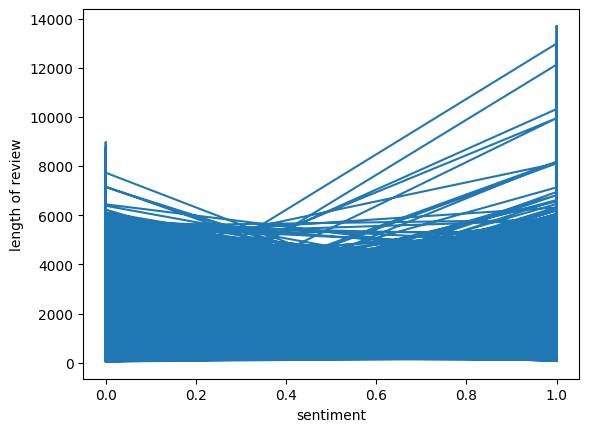

In [ ]:
#PLANNING PLOTTING
list=[]

for reviews in np.array(ndata['text']):
    list.append(len(reviews))

#line plot
plt.plot(ndata['label'],list)
plt.xlabel('sentiment')
plt.ylabel('length of review')
plt.show()

#scatter plot

# plt.scatter(ndata['label'],list)
# plt.xlabel('sentiment')
# plt.ylabel('length of review')
# plt.show()

#bar plot
# plt.bar(ndata['label'],list)
# plt.xlabel('sentiment')
# plt.ylabel('length of review')
# plt.show()


Data Pre-Processing

In [ ]:

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
import re

In [ ]:
nlp=spacy.load('en_core_web_sm')


In [ ]:
def preprocessing(textdata):

  text=textdata.lower()


  nlptext=nlp(text)
  nostopword=[token.text for token in nlptext if not token.is_stop and not token.is_punct and not token.is_digit]
  text1=" ".join(nostopword)

  return re.sub(r'[^a-zA-Z0-9\s]','',text1)



In [ ]:
ndata['new_text']=ndata['text'].apply(preprocessing)

<ipython-input-14-acd4f3b6a2d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndata['new_text']=ndata['text'].apply(preprocessing)


In [ ]:
print(ndata['new_text'][0])

grew b watching loving thunderbirds mates school watched played thunderbirds school lunch school wanted virgil scott wanted alan counting art form took children movie hoping glimpse loved child bitterly disappointing high point snappy theme tune compare original score thunderbirds thankfully early saturday mornings television channel plays reruns series gerry anderson wife created jonatha frakes hand directors chair version completely hopeless waste film utter rubbish cgi remake acceptable replacing marionettes homo sapiens subsp sapiens huge error judgment


In [ ]:

def lemm(text):
  doc=nlp(text)
  listl=[]
  for token in doc:
    listl.append(token.lemma_)
  return listl


In [ ]:

ndata['new_lem_text']=ndata['new_text'].apply(lemm)

<ipython-input-17-aa2126d53812>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndata['new_lem_text']=ndata['new_text'].apply(lemm)


Embedding

In [ ]:
print(ndata['new_lem_text'][0])

['grow', 'b', 'watch', 'love', 'thunderbird', 'mate', 'school', 'watch', 'play', 'thunderbirds', 'school', 'lunch', 'school', 'want', 'virgil', 'scott', 'want', 'alan', 'count', 'art', 'form', 'take', 'child', 'movie', 'hope', 'glimpse', 'love', 'child', 'bitterly', 'disappointing', 'high', 'point', 'snappy', 'theme', 'tune', 'compare', 'original', 'score', 'thunderbird', 'thankfully', 'early', 'saturday', 'morning', 'television', 'channel', 'play', 'reruns', 'series', 'gerry', 'anderson', 'wife', 'create', 'jonatha', 'frake', 'hand', 'director', 'chair', 'version', 'completely', 'hopeless', 'waste', 'film', 'utter', 'rubbish', 'cgi', 'remake', 'acceptable', 'replace', 'marionette', 'homo', 'sapiens', 'subsp', 'sapiens', 'huge', 'error', 'judgment']


In [ ]:
import gensim.downloader as api
wv=api.load("word2vec-google-news-300")

In [ ]:
def embedd(toklist):
  return wv.get_mean_vector(toklist)


In [ ]:
ndata['labeled_text']=ndata['new_lem_text'].apply(embedd)

In [ ]:
from sklearn.model_selection import train_test_split

Feature Extractions

In [23]:
x_train,x_test,y_train,y_test=train_test_split(ndata.labeled_text.values,ndata['label'],test_size=0.2)

In [42]:
flattened_array = np.concatenate(x_train.flatten())
x_train = flattened_array.reshape((x_train.shape[0], -1))

flattened_array = np.concatenate(x_test.flatten())
x_test = flattened_array.reshape((x_test.shape[0], -1))

Model Selection

In [46]:
x_test


array([[ 0.01722618,  0.00175391, -0.00818875, ..., -0.01229235,
         0.00059474,  0.00626147],
       [ 0.02030406,  0.00686113, -0.00973396, ..., -0.01622019,
         0.00717512, -0.01012808],
       [ 0.02047669,  0.02159352, -0.01849414, ...,  0.00323487,
         0.00107325, -0.00185711],
       ...,
       [ 0.03162436,  0.01409926, -0.02111873, ..., -0.03405204,
        -0.000887  , -0.02485021],
       [ 0.03751979,  0.02358196,  0.00080649, ..., -0.01415105,
        -0.00497479,  0.00571508],
       [ 0.01926471,  0.00910334, -0.04357769, ..., -0.0170726 ,
         0.01518925, -0.00584537]], dtype=float32)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [47]:
model_lr=LogisticRegression()
model_bnb = BernoulliNB()
model_svc=SVC()
model_rfc=RandomForestClassifier()

model_lr.fit(x_train,y_train)
model_bnb.fit(x_train,y_train)
model_svc.fit(x_train,y_train)
model_rfc.fit(x_train,y_train)


RandomForestClassifier()

In [60]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [69]:
model_nn=keras.Sequential([
    keras.layers.Dense(500,input_shape=(300,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model_nn.compile(
    optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']
)

model_nn.fit(x_train,y_train,epochs=10)
y_pred_nn=model_nn.predict(x_test)


Epoch 1/10
994/994 [==============================] - 9s 8ms/step - loss: 0.4388 - accuracy: 0.8032
Epoch 2/10
994/994 [==============================] - 7s 7ms/step - loss: 0.3716 - accuracy: 0.8361
Epoch 3/10
994/994 [==============================] - 9s 9ms/step - loss: 0.3615 - accuracy: 0.8409
Epoch 4/10
994/994 [==============================] - 6s 6ms/step - loss: 0.3557 - accuracy: 0.8438
Epoch 5/10
994/994 [==============================] - 7s 7ms/step - loss: 0.3523 - accuracy: 0.8454
Epoch 6/10
994/994 [==============================] - 7s 7ms/step - loss: 0.3492 - accuracy: 0.8464
Epoch 7/10
994/994 [==============================] - 8s 9ms/step - loss: 0.3486 - accuracy: 0.8459
Epoch 8/10
994/994 [==============================] - 15s 15ms/step - loss: 0.3432 - accuracy: 0.8491
Epoch 9/10
994/994 [==============================] - 14s 14ms/step - loss: 0.3411 - accuracy: 0.8489
Epoch 10/10
249/249 [==============================] - 1s 5ms/step


In [77]:
y_pred_nn=[1 if x>0.5 else 0 for x in y_pred_nn]

In [79]:
y_pred_nn

[1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,


In [48]:
y_pred_lr=model_lr.predict(x_test)
y_pred_bnb=model_bnb.predict(x_test)
y_pred_svc=model_svc.predict(x_test)
y_pred_rfc=model_rfc.predict(x_test)


In [53]:
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix,accuracy_score



Accuracy= 0.8271869100062933
ROC_AUC_Score 0.8270419880614299
F1-Score 0.8233174623600567


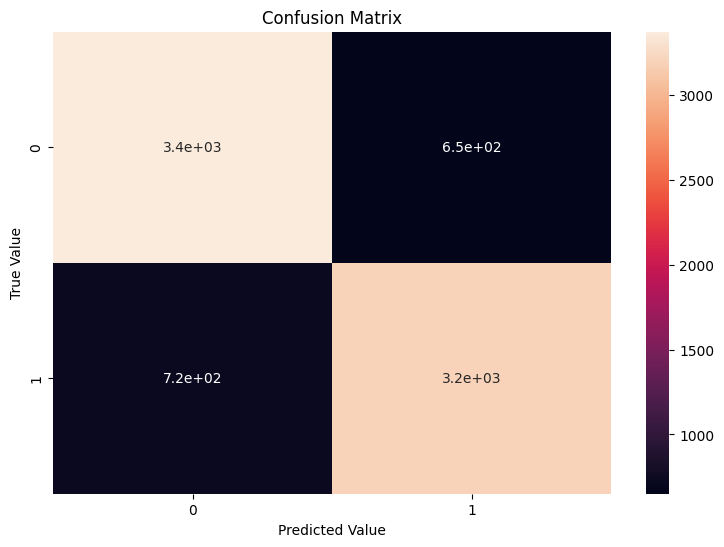

In [54]:
print("Accuracy=",accuracy_score(y_test,y_pred_lr))
print("ROC_AUC_Score",roc_auc_score(y_test,y_pred_lr))
print("F1-Score",f1_score(y_test,y_pred_lr))

cm=confusion_matrix(y_test,y_pred_lr)
plt.figure(figsize=(9,6))
sbn.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()



Accuracy= 0.7467589679043424
ROC_AUC_Score 0.7463965252098731
F1-Score 0.7368558723515564


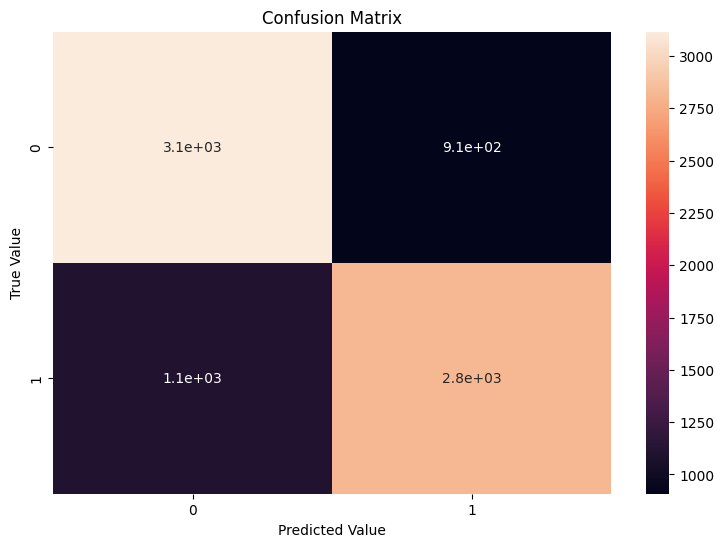

In [56]:
print("Accuracy=",accuracy_score(y_test,y_pred_bnb))
print("ROC_AUC_Score",roc_auc_score(y_test,y_pred_bnb))
print("F1-Score",f1_score(y_test,y_pred_bnb))

cm=confusion_matrix(y_test,y_pred_bnb)
plt.figure(figsize=(9,6))
sbn.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

Accuracy= 0.8536186280679673
ROC_AUC_Score 0.8536119739101733
F1-Score 0.8519037310581944


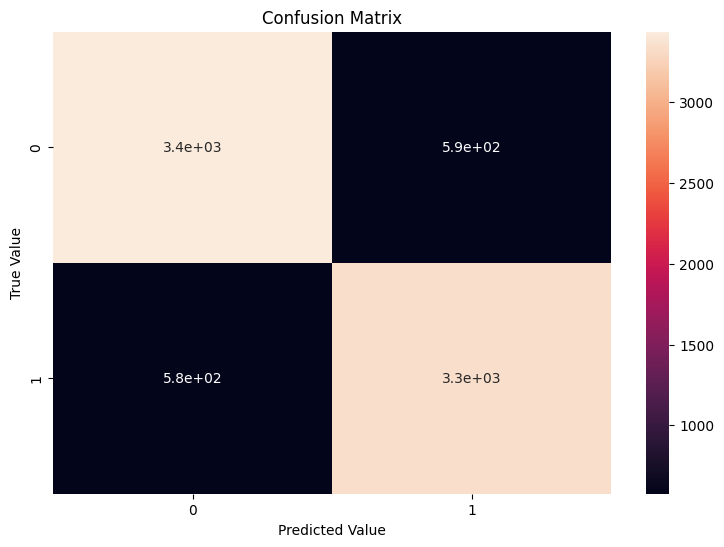

In [57]:
print("Accuracy=",accuracy_score(y_test,y_pred_svc))
print("ROC_AUC_Score",roc_auc_score(y_test,y_pred_svc))
print("F1-Score",f1_score(y_test,y_pred_svc))

cm=confusion_matrix(y_test,y_pred_svc)
plt.figure(figsize=(9,6))
sbn.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

Accuracy= 0.8013845185651353
ROC_AUC_Score 0.8014033561953959
F1-Score 0.7995935991871984


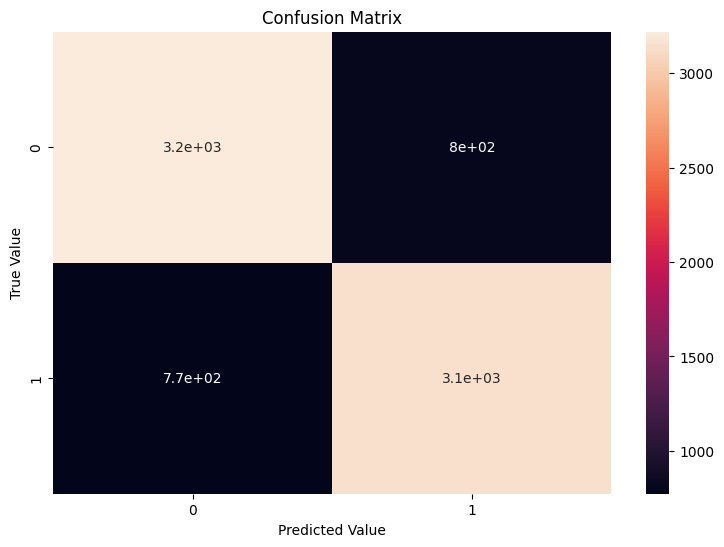

In [58]:
print("Accuracy=",accuracy_score(y_test,y_pred_rfc))
print("ROC_AUC_Score",roc_auc_score(y_test,y_pred_rfc))
print("F1-Score",f1_score(y_test,y_pred_rfc))

cm=confusion_matrix(y_test,y_pred_rfc)
plt.figure(figsize=(9,6))
sbn.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

Accuracy= 0.8362492133417243
ROC_AUC_Score 0.8352996025377954
F1-Score 0.8212175346983648


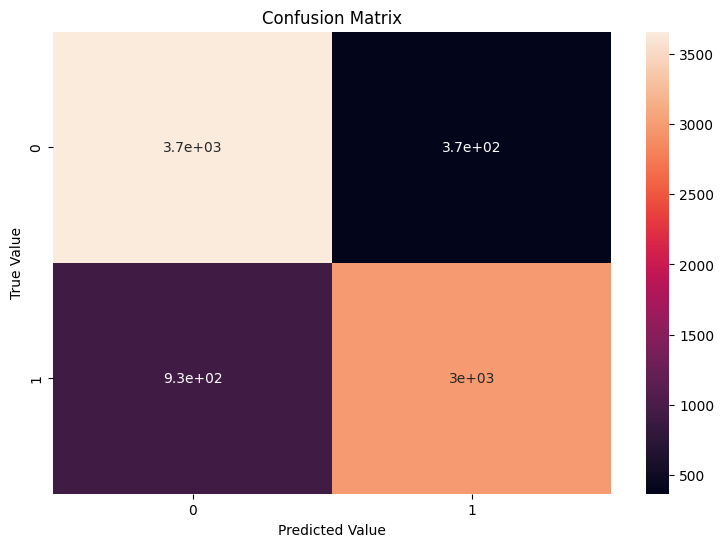

In [80]:
print("Accuracy=",accuracy_score(y_test,y_pred_nn))
print("ROC_AUC_Score",roc_auc_score(y_test,y_pred_nn))
print("F1-Score",f1_score(y_test,y_pred_nn))

cm=confusion_matrix(y_test,y_pred_nn)
plt.figure(figsize=(9,6))
sbn.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()